In [1]:
import pandas as pd

In [2]:
#for csv
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape # row, col

(60, 2)

In [4]:
#for xlsx
#df = pd.read_excel("Dhaka Rent 2.xlsx")
#df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [6]:
#missing checking
df.isnull().sum()

area    0
rent    0
dtype: int64

In [7]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [8]:
df[['rent']].head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


Text(0.5, 1.0, 'Dhaka Rent Analysis')

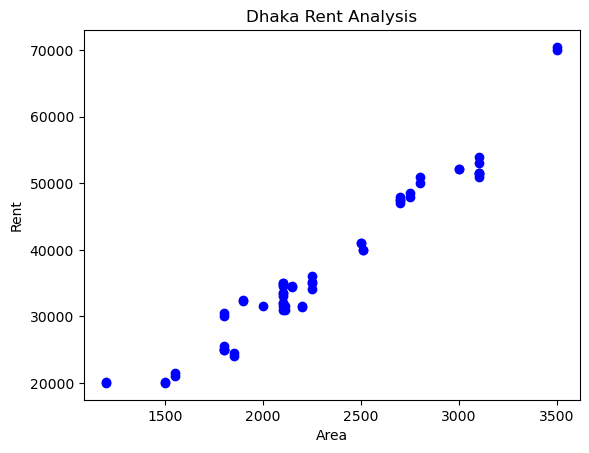

In [9]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [10]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [11]:
x = df['area']
y = df['rent']

# Linear Reagression - Step 01

In [12]:
import numpy as np

In [13]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [14]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [15]:
coefficient = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 
coefficient

21.292661473611954

In [17]:
intercept = mean_y - (coefficient * mean_x)

In [18]:
pred_y = (coefficient * 2000) + intercept
pred_y

31115.58750079281

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [21]:
reg.fit(df[['area']] , df[['rent']]) #training

LinearRegression()

In [22]:
reg.coef_

array([[21.29266147]])

In [23]:
reg.intercept_

array([-11469.73544643])

In [24]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [25]:
m = reg.coef_
c = reg.intercept_
m*2000 + c

array([[31115.58750079]])

In [26]:
reg.predict([[2000]])

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [27]:
df['predicted_rent'] = reg.predict(df[['area']])

In [28]:
df.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [29]:
df['residiuls'] = df['rent'] - df['predicted_rent']

In [30]:
df.head()

,area,rent,predicted_rent,residiuls
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [31]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['rent'], df['predicted_rent'])

In [32]:
mse

6778077.2040955555

In [33]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['rent'], df['predicted_rent'])

In [34]:
mae

2009.869509357628

In [35]:
#RMSE
import math
math.sqrt(mse)

2603.4740644176877

Text(0.5, 1.0, 'Dhaka Rent Analysis')

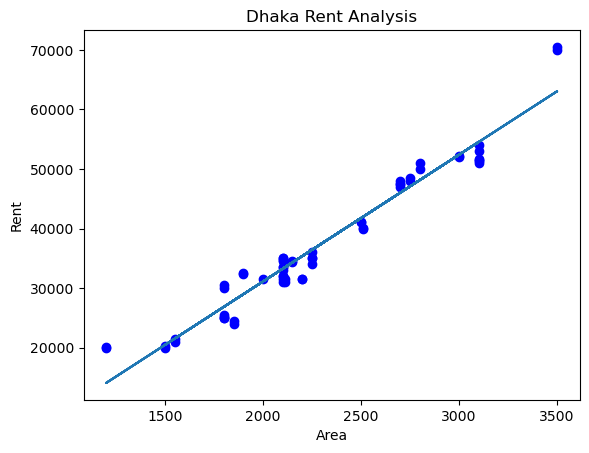

In [36]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [37]:
np.mean(x)

2289.0

In [38]:
np.mean(y)

37269.166666666664

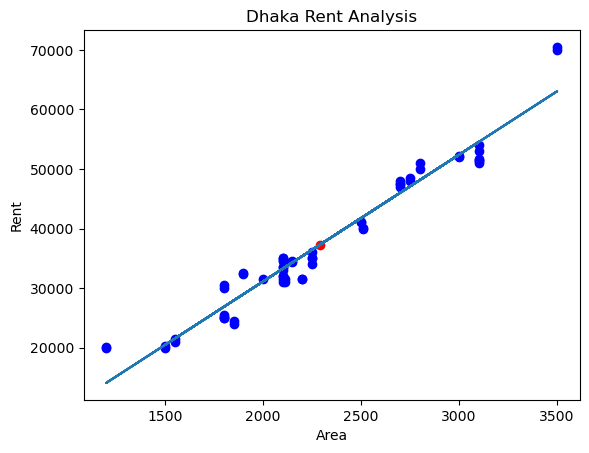

In [39]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])
#import matplotlib.pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
#mean
plt.scatter(np.mean(x), np.mean(y), color='red', marker='o')